Recurrent Neural Networks (RNN) are very effective for Natural Language Processing and other sequence tasks because they have "memory". They can read inputs $x^{\langle t \rangle}$ (such as words) one at a time, and remember some information/context through the hidden layer activations that get passed from one time-step to the next. This allows a uni-directional RNN to take information from the past to process later inputs. A bidirection RNN can take context from both the past and the future.

# Notation:

Superscript $[l]$ denotes an object associated with the $l^{th}$ layer.

Example: $a^{[4]}$ is the $4^{th}$ layer activation. $W^{[5]}$ and $b^{[5]}$ are the $5^{th}$ layer parameters.

Superscript $(i)$ denotes an object associated with the $i^{th}$ example.
Example: $x^{(i)}$ is the $i^{th}$ training example input.

Superscript $\langle t \rangle$ denotes an object at the $t^{th}$ time-step.
Example: $x^{\langle t \rangle}$ is the input x at the $t^{th}$ time-step. $x^{(i)\langle t \rangle}$ is the input at the $t^{th}$ timestep of example $i$.

Lowerscript $i$ denotes the $i^{th}$ entry of a vector.
Example: $a^{[l]}_i$ denotes the $i^{th}$ entry of the activations in layer $l$.

In [5]:
import numpy as np
from rnn_utils import *
from IPython.display import Image
from IPython.core.display import HTML 

# Forward propagation for RNN

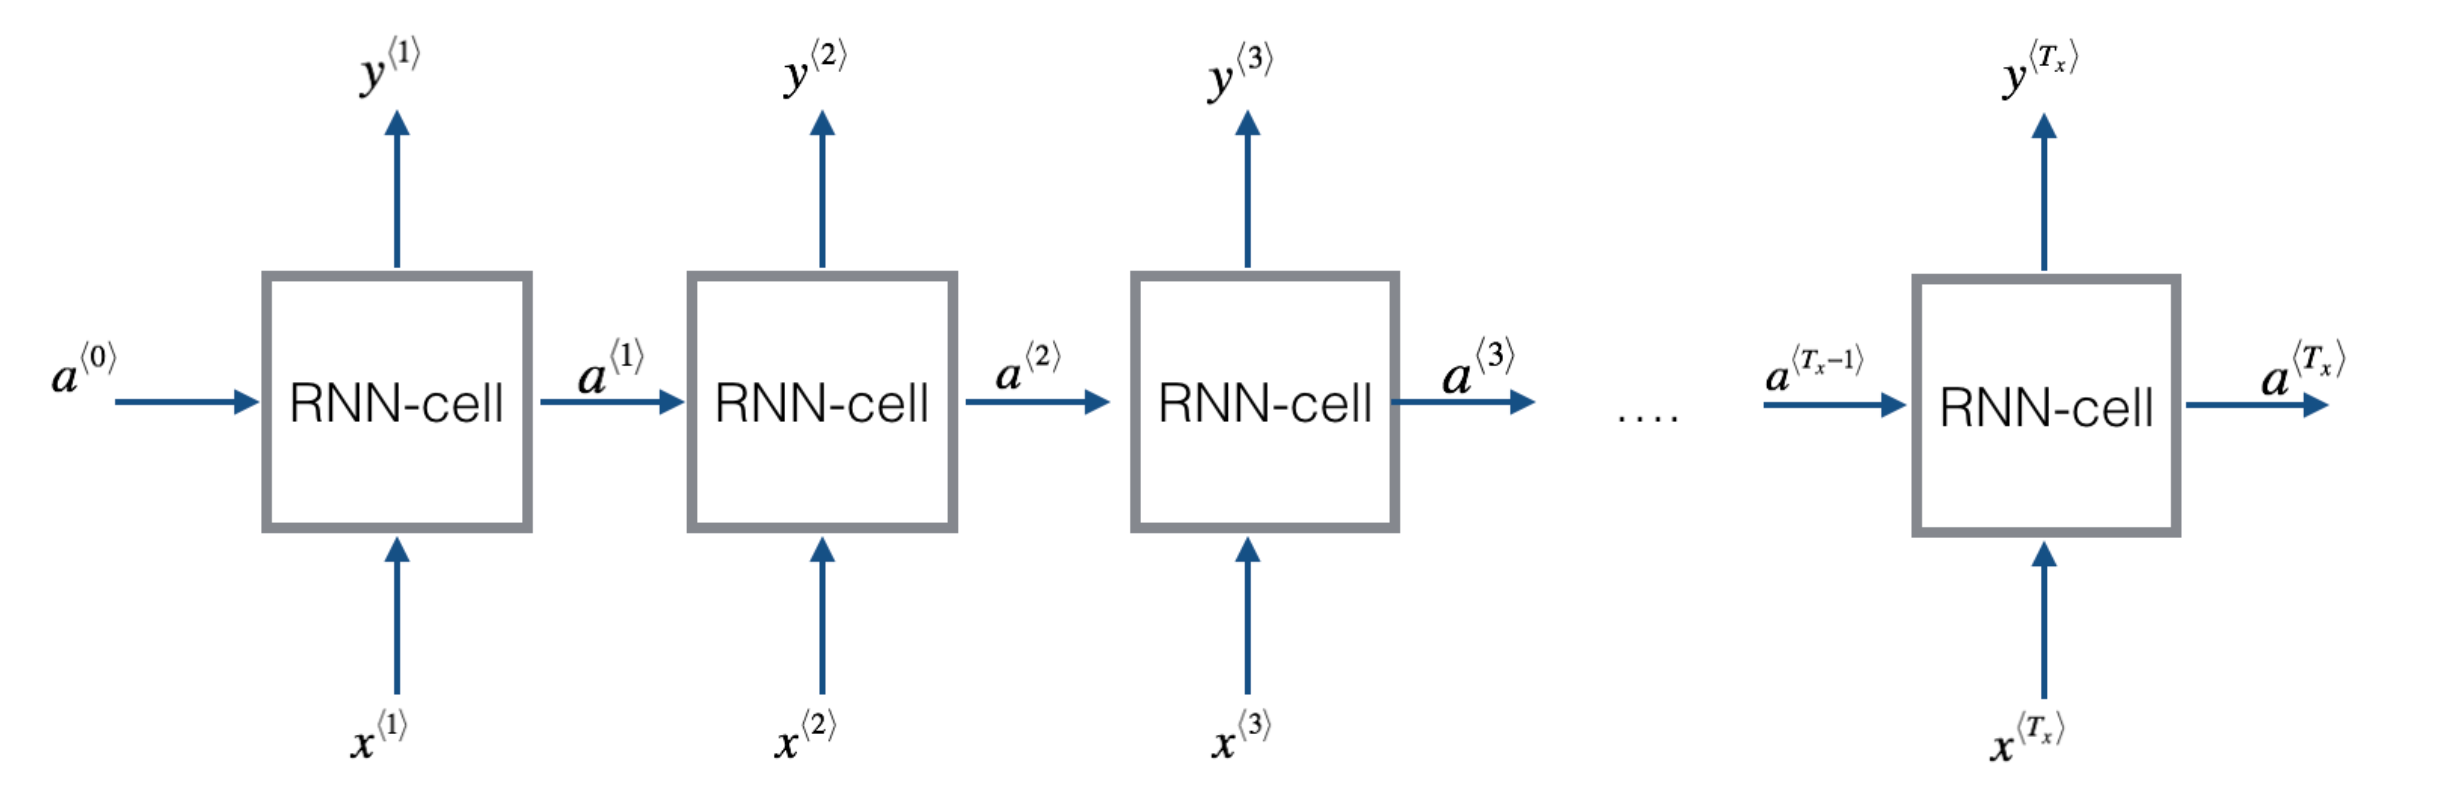

In [15]:
Image(filename = "RNN.png", width=4000, height=200)

1. First step is to build a single cell of RNN. RNN is in fact a repitition of single cell. Lets build a single cell.

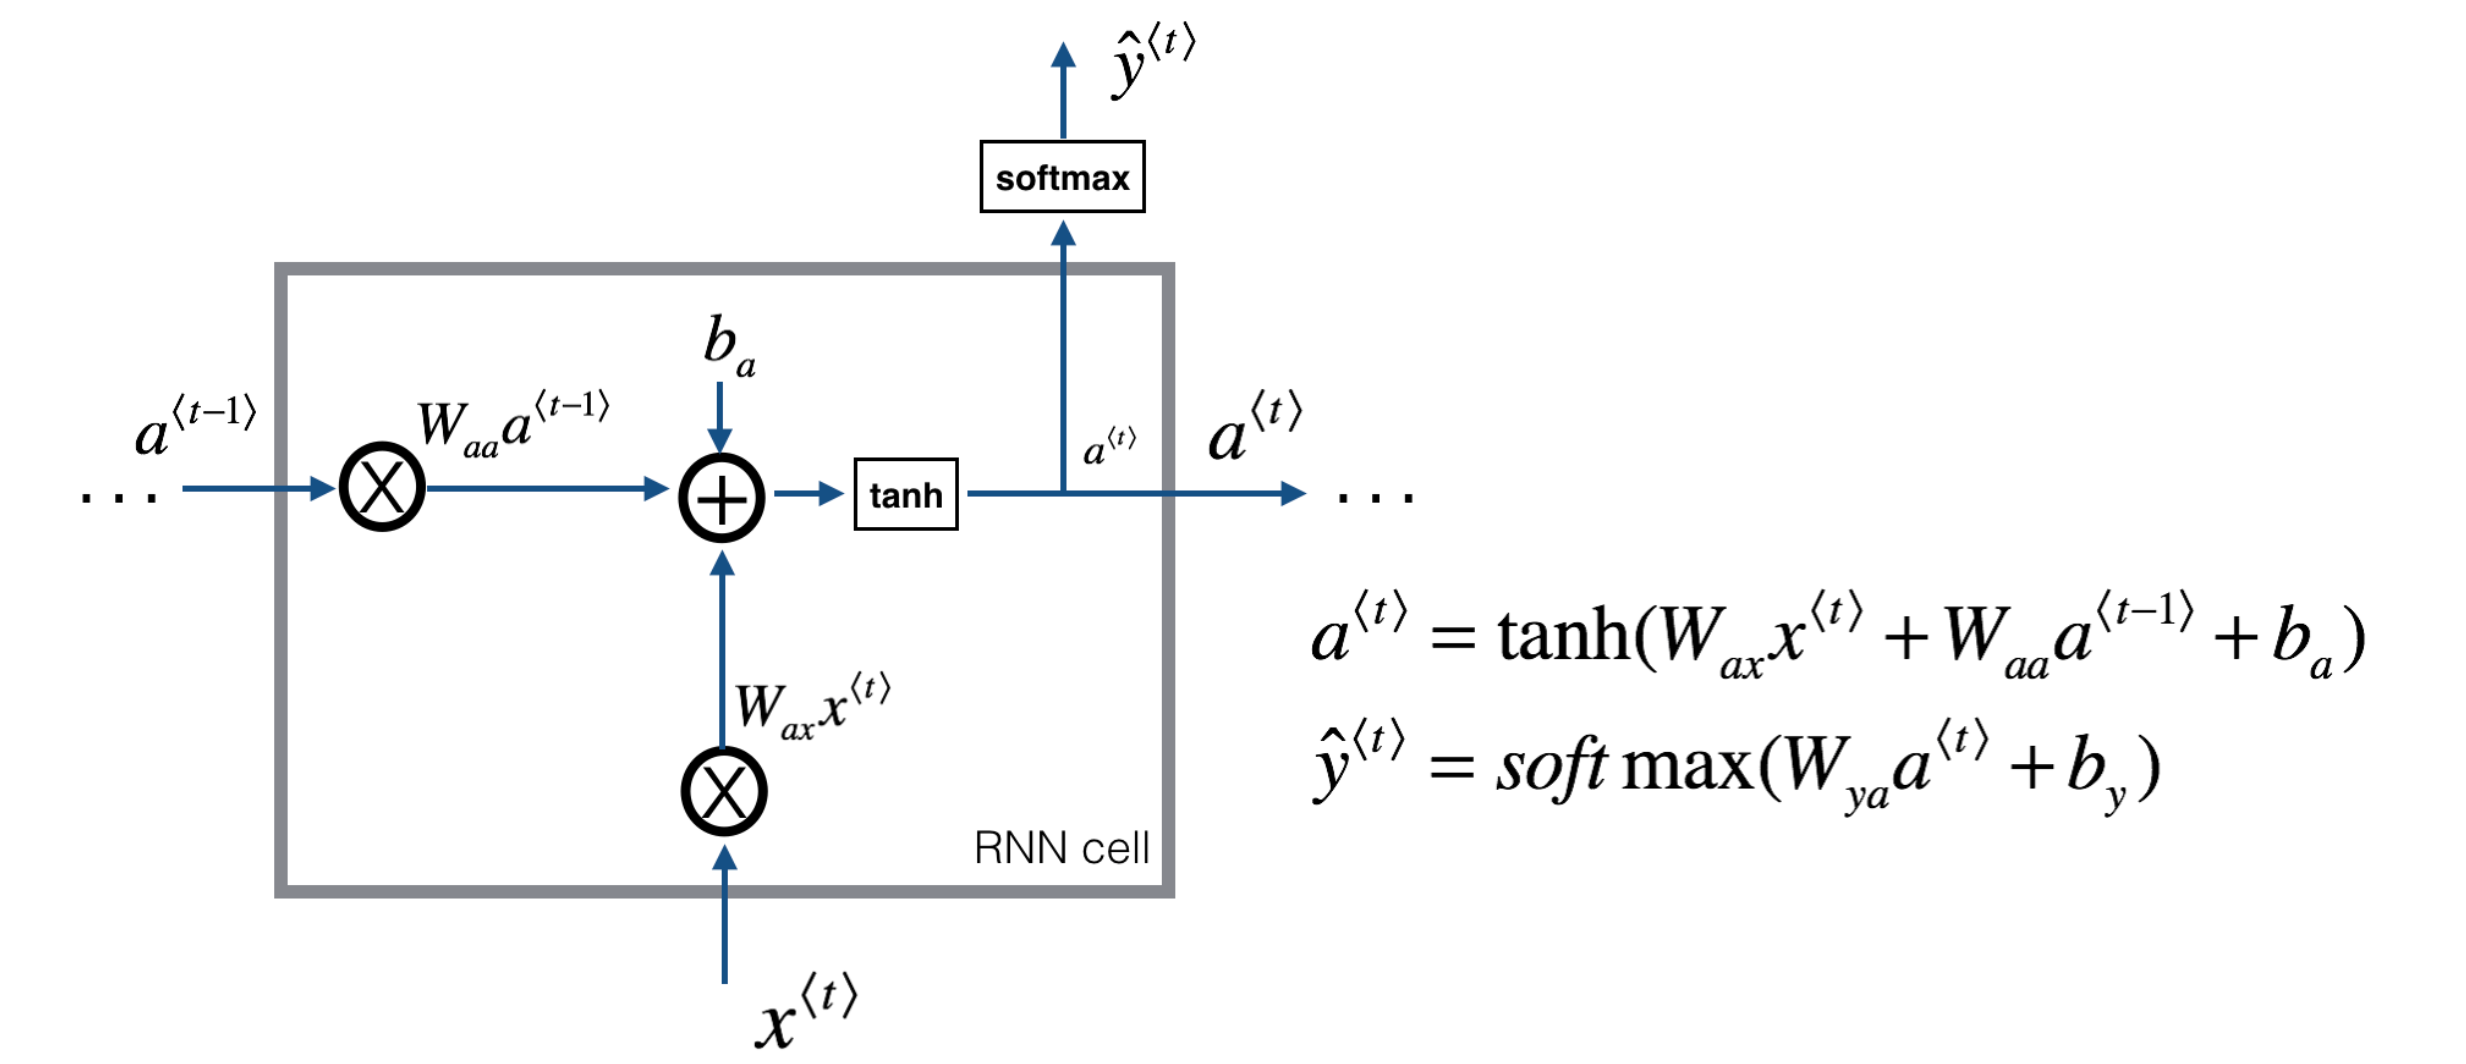

In [16]:
# RNN-cell
Image(filename = "cell.png", width=4000, height=200)

# Instructions:

Compute the hidden state with tanh activation: $a^{\langle t \rangle} = \tanh(W_{aa} a^{\langle t-1 \rangle} + W_{ax} x^{\langle t \rangle} + b_a)$.

Using your new hidden state $a^{\langle t \rangle}$, compute the prediction $\hat{y}^{\langle t \rangle} = softmax(W_{ya} a^{\langle t \rangle} + b_y)$. 

We provided you a function: softmax.
Store $(a^{\langle t \rangle}, a^{\langle t-1 \rangle}, x^{\langle t \rangle}, parameters)$ in cache
Return $a^{\langle t \rangle}$ , $y^{\langle t \rangle}$ and cache


We will vectorize over $m$ examples. Thus, $x^{\langle t \rangle}$ will have dimension $(n_x,m)$, and $a^{\langle t \rangle}$ will have dimension $(n_a,m)$.

In [50]:
def rnn_cell_forward(xt, a_prev, parameters):
    """
    Implements a single forward step of the RNN-cell

    Arguments:
    xt -- your input data at timestep "t", numpy array of shape (n_x, m).
    a_prev -- Hidden state at timestep "t-1", numpy array of shape (n_a, m)
    parameters -- python dictionary containing:
                        Wax -- Weight matrix multiplying the input, numpy array of shape (n_a, n_x)
                        Waa -- Weight matrix multiplying the hidden state, numpy array of shape (n_a, n_a)
                        Waa -- Weight matrix relating the hidden-state to the output, numpy array of shape (n_y, n_a)
                        ba --  Bias, numpy array of shape (n_a, 1)
                        by -- Bias relating the hidden-state to the output, numpy array of shape (n_y, 1)
    Returns:
    a_next -- next hidden state, of shape (n_a, m)
    yt_pred -- prediction at timestep "t", numpy array of shape (n_y, m)
    cache -- tuple of values needed for the backward pass, contains (a_next, a_prev, xt, parameters)
    """
    
    # Retrieve parameters from "parameters"
    Wax =  parameters["Wax"]
    Waa =  parameters["Waa"]
    Waa =  parameters["Waa"]
    ba =  parameters["ba"]
    by =  parameters["by"]
    
    
    # Compute the next activation
    a_next = np.tanh(np.dot(Wax, xt) + np.dot(Waa, a_prev) + ba)
    
    
    # Compute prediction at time step "t"
    yt_pred = softmax(np.dot(Wya, a_next) + by)
    
    
    # tuple of values needed for the backward pass
    cache = (a_next, a_prev, xt, parameters)
    
    return a_next, yt_pred, cache

In [51]:
np.random.seed(1)
xt = np.random.randn(3,10)
a_prev = np.random.randn(5,10)
Waa = np.random.randn(5,5)
Wax = np.random.randn(5,3)
Wya = np.random.randn(2,5)
ba = np.random.randn(5,1)
by = np.random.randn(2,1)
parameters = {"Waa": Waa, "Wax": Wax, "Wya": Wya, "ba": ba, "by": by}

a_next, yt_pred, cache = rnn_cell_forward(xt, a_prev, parameters)
print("a_next[4] = ", a_next[4])
print("a_next.shape = ", a_next.shape)
print("yt_pred[1] =", yt_pred[1])
print("yt_pred.shape = ", yt_pred.shape)

a_next[4] =  [ 0.59584544  0.18141802  0.61311866  0.99808218  0.85016201  0.99980978
 -0.18887155  0.99815551  0.6531151   0.82872037]
a_next.shape =  (5, 10)
yt_pred[1] = [0.9888161  0.01682021 0.21140899 0.36817467 0.98988387 0.88945212
 0.36920224 0.9966312  0.9982559  0.17746526]
yt_pred.shape =  (2, 10)


# RNN forward pass

You can see an RNN as the repetition of the cell you've just built. If your input sequence of data is carried over 10 time steps, then you will copy the RNN cell 10 times. Each cell takes as input the hidden state from the previous cell ($a^{\langle t-1 \rangle}$) and the current time-step's input data ($x^{\langle t \rangle}$). It outputs a hidden state ($a^{\langle t \rangle}$) and a prediction ($y^{\langle t \rangle}$) for this time-step.

## Instructions:

Create a vector of zeros ($a$) that will store all the hidden states computed by the RNN.

Initialize the "next" hidden state as $a_0$ (initial hidden state).

Start looping over each time step, your incremental index is $t$ :
Update the "next" hidden state and the cache by running rnn_cell_forward

Store the "next" hidden state in $a$ ($t^{th}$ position)

Store the prediction in y

Add the cache to the list of caches

Return $a$, $y$ and caches

In [72]:
def rnn_forward(x, a0, parameters):
    """
    Implement the forward propagation of the recurrent neural network described in Figure (3).

    Arguments:
    x -- Input data for every time-step, of shape (n_x, m, T_x).
    a0 -- Initial hidden state, of shape (n_a, m)
    parameters -- python dictionary containing:
                        Waa -- Weight matrix multiplying the hidden state, numpy array of shape (n_a, n_a)
                        Wax -- Weight matrix multiplying the input, numpy array of shape (n_a, n_x)
                        Wya -- Weight matrix relating the hidden-state to the output, numpy array of shape (n_y, n_a)
                        ba --  Bias numpy array of shape (n_a, 1)
                        by -- Bias relating the hidden-state to the output, numpy array of shape (n_y, 1)

    Returns:
    a -- Hidden states for every time-step, numpy array of shape (n_a, m, T_x)
    y_pred -- Predictions for every time-step, numpy array of shape (n_y, m, T_x)
    caches -- tuple of values needed for the backward pass, contains (list of caches, x)
    """
    # Retrive the dimensions from shapes of x and parameters["Wya"]
    n_x, m, T_x = x.shape
    n_y, n_a = parameters['Wya'].shape
    
    # Initialize a which include the hidden states for every time-step
    a = np.zeros((n_a, m , T_x))
    
    # Initialize y_pred which includes predictions for every time-step
    y_pred = np.zeros((n_y, m , T_x))
    
    # Initialize caches which includes the list of caches 
    caches = []
    
    
    # Loop over all time steps
    for t in range(T_x):
        
        # Retrive xt (input for the time step of t)
        xt = x[:,:,t]
        
        #Update next hidden state, compute the prediction, get the cache
        a[:,:,t], y_pred[:,:,t], cache = rnn_cell_forward(xt, a0, parameters)
        
        # Update a0
        a0 = a[:,:,t]
        
        # Append "cache" to "caches"
        caches.append(cache)
        
    # store values needed for backward propagation in cache
    caches = (caches, x) 
    
    return a, y_pred, caches

In [73]:
np.random.seed(1)
x = np.random.randn(3,10,4)
a0 = np.random.randn(5,10)
Waa = np.random.randn(5,5)
Wax = np.random.randn(5,3)
Wya = np.random.randn(2,5)
ba = np.random.randn(5,1)
by = np.random.randn(2,1)
parameters = {"Waa": Waa, "Wax": Wax, "Wya": Wya, "ba": ba, "by": by}

a, y_pred, caches = rnn_forward(x, a0, parameters)
print("a[4][1] = ", a[4][1])
print("a.shape = ", a.shape)
print("y_pred[1][3] =", y_pred[1][3])
print("y_pred.shape = ", y_pred.shape)
print("caches[1][1][3] =", caches[1][1][3])
print("len(caches) = ", len(caches))

a[4][1] =  [-0.99999375  0.77911235 -0.99861469 -0.99833267]
a.shape =  (5, 10, 4)
y_pred[1][3] = [0.79560373 0.86224861 0.11118257 0.81515947]
y_pred.shape =  (2, 10, 4)
caches[1][1][3] = [-1.1425182  -0.34934272 -0.20889423  0.58662319]
len(caches) =  2


The forward propagation of a RNN will work well enough for some applications. It suffers suffers from vanishing gradient problems. So it works best when each output $y^{\langle t \rangle}$ can be estimated using mainly "local" context (meaning information from inputs $x^{\langle t' \rangle}$ where $t'$ is not too far from $t$).

# Long Short Memory Term (LSTM)

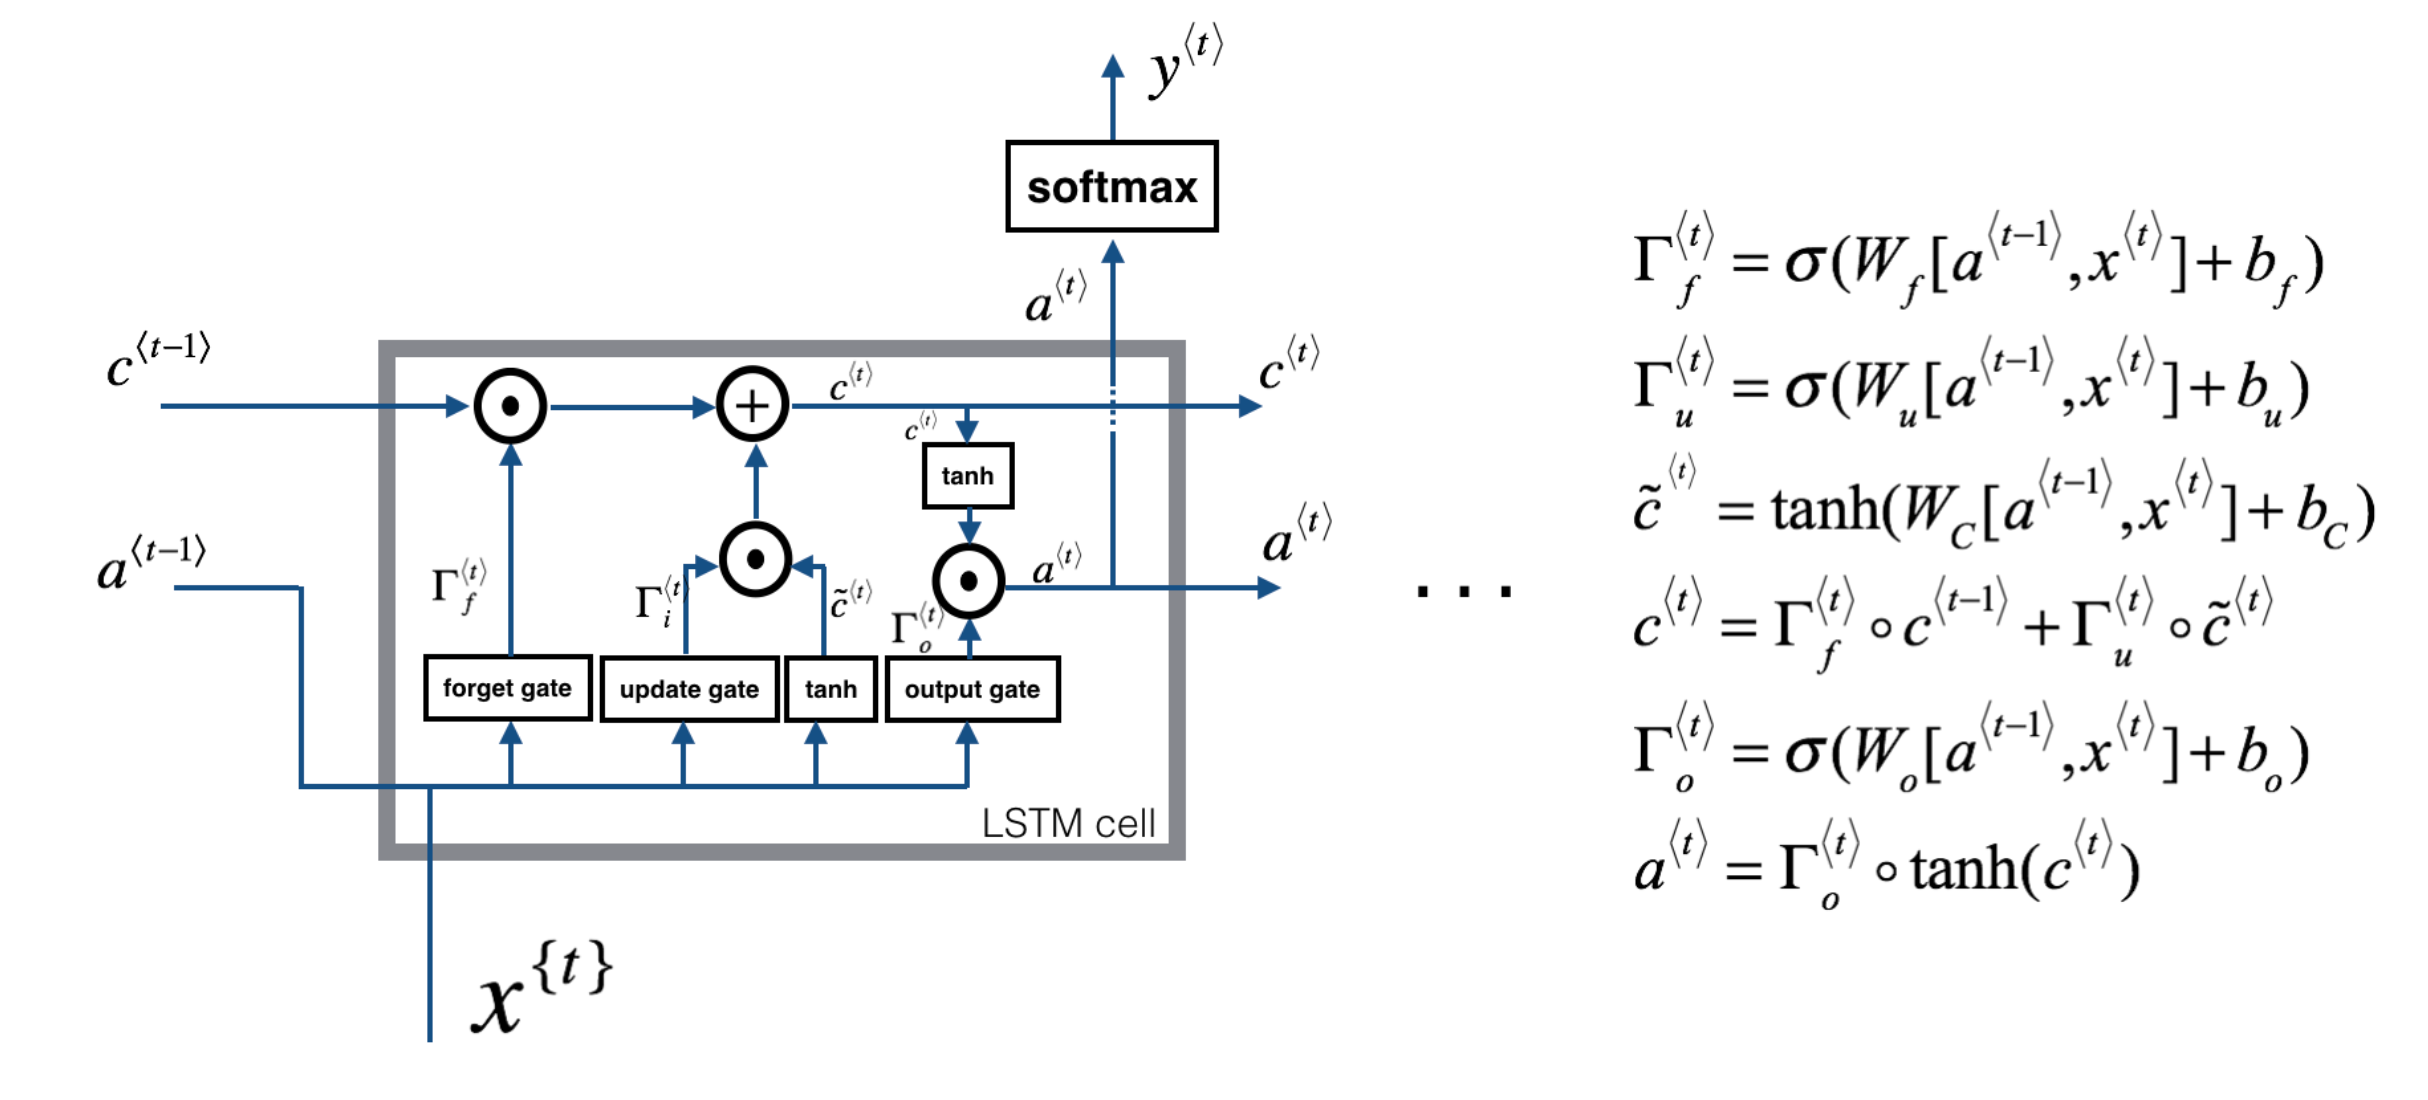

In [74]:
Image(filename = "LSTM.png", width=4000, height=200)

- Forget gate

For the sake of this illustration, lets assume we are reading words in a piece of text, and want use an LSTM to keep track of grammatical structures, such as whether the subject is singular or plural. If the subject changes from a singular word to a plural word, we need to find a way to get rid of our previously stored memory value of the singular/plural state. In an LSTM, the forget gate lets us do this:

$$\Gamma_f^{\langle t \rangle} = \sigma(W_f[a^{\langle t-1 \rangle}, x^{\langle t \rangle}] + b_f)\tag{1} $$
Here, $W_f$ are weights that govern the forget gate's behavior. We concatenate $[a^{\langle t-1 \rangle}, x^{\langle t \rangle}]$ and multiply by $W_f$. The equation above results in a vector $\Gamma_f^{\langle t \rangle}$ with values between 0 and 1. This forget gate vector will be multiplied element-wise by the previous cell state $c^{\langle t-1 \rangle}$. So if one of the values of $\Gamma_f^{\langle t \rangle}$ is 0 (or close to 0) then it means that the LSTM should remove that piece of information (e.g. the singular subject) in the corresponding component of $c^{\langle t-1 \rangle}$. If one of the values is 1, then it will keep the information.

- Update gate

Once we forget that the subject being discussed is singular, we need to find a way to update it to reflect that the new subject is now plural. Here is the formula for the update gate:

$$\Gamma_u^{\langle t \rangle} = \sigma(W_u[a^{\langle t-1 \rangle}, x^{\{t\}}] + b_u)\tag{2} $$
Similar to the forget gate, here $\Gamma_u^{\langle t \rangle}$ is again a vector of values between 0 and 1. This will be multiplied element-wise with $\tilde{c}^{\langle t \rangle}$, in order to compute $c^{\langle t \rangle}$.

- Updating the cell

To update the new subject we need to create a new vector of numbers that we can add to our previous cell state. The equation we use is:

$$ \tilde{c}^{\langle t \rangle} = \tanh(W_c[a^{\langle t-1 \rangle}, x^{\langle t \rangle}] + b_c)\tag{3} $$
Finally, the new cell state is:

$$ c^{\langle t \rangle} = \Gamma_f^{\langle t \rangle}* c^{\langle t-1 \rangle} + \Gamma_u^{\langle t \rangle} *\tilde{c}^{\langle t \rangle} \tag{4} $$

- Output gate

To decide which outputs we will use, we will use the following two formulas:

$$ \Gamma_o^{\langle t \rangle}=  \sigma(W_o[a^{\langle t-1 \rangle}, x^{\langle t \rangle}] + b_o)\tag{5}$$
$$ a^{\langle t \rangle} = \Gamma_o^{\langle t \rangle}* \tanh(c^{\langle t \rangle})\tag{6} $$

Where in equation 5 you decide what to output using a sigmoid function and in equation 6 you multiply that by the $\tanh$ of the previous state.

# LSTM Cell

In [117]:
def lstm_cell_forward(xt, a_prev, c_prev, parameters):
    """
    Implement a single forward step of the LSTM-cell as described in Figure (4)

    Arguments:
    xt = your input data at timestep "t", numpy array of shape (n_x, m).
    a_prev = Hidden state at timestep "t-1", numpy array of shape (n_a, m)
    c_prev = Memory state at timestep "t-1", numpy array of shape (n_a, m)
    parameters = python dictionary containing:
                        Wf = Weight matrix of the forget gate, numpy array of shape (n_a, n_a + n_x)
                        bf = Bias of the forget gate, numpy array of shape (n_a, 1)
                        Wi = Weight matrix of the update gate, numpy array of shape (n_a, n_a + n_x)
                        bi = Bias of the update gate, numpy array of shape (n_a, 1)
                        Wc = Weight matrix of the first "tanh", numpy array of shape (n_a, n_a + n_x)
                        bc =  Bias of the first "tanh", numpy array of shape (n_a, 1)
                        Wo = Weight matrix of the output gate, numpy array of shape (n_a, n_a + n_x)
                        bo =  Bias of the output gate, numpy array of shape (n_a, 1)
                        Wy = Weight matrix relating the hidden-state to the output, numpy array of shape (n_y, n_a)
                        by = Bias relating the hidden-state to the output, numpy array of shape (n_y, 1)
                        
    Returns:
    a_next = next hidden state, of shape (n_a, m)
    c_next = next memory state, of shape (n_a, m)
    yt_pred = prediction at timestep "t", numpy array of shape (n_y, m)
    cache = tuple of values needed for the backward pass, contains (a_next, c_next, a_prev, c_prev, xt, parameters)
    
    Note: ft/it/ot stand for the forget/update/output gates, cct stands for the candidate value (c tilde),
          c stands for the memory value
    """
    
    # Concate xt and a_prev
    concat = np.concatenate((a_prev, xt), axis = 0)
    
    # Retrive the parameters
    Wf = parameters['Wf']
    bf = parameters['bf']
    Wi = parameters['Wi']
    bi = parameters['bi']
    Wc = parameters['Wc']
    bc = parameters['bc']
    Wo = parameters['Wo']
    bo = parameters['bo']
    Wy = parameters['Wy']
    by = parameters['by']
    
    # Calculate candidate value (c tilde)
    cct = np.tanh(np.dot(Wc, concat) + bc)
    
    # Forget gate
    ft = sigmoid(np.dot(Wf, concat) + bf)
    
    # Update gate
    it = sigmoid(np.dot(Wi, concat) + bi)
    
    # Output gate
    ot = sigmoid(np.dot(Wo, concat) + bo)
    
    # Compute next memory state
    c_next = np.multiply(ft, c_prev) + np.multiply(it, cct)
    
    # Compute next hidden state
    a_next = np.multiply(ot, np.tanh(c_next))
    
    # Compute yt_pred
    yt_pred = softmax(np.dot(Wy, a_next) + by)
    
    
    # values needed for the backward pass 
    cache = (a_next, c_next, a_prev, c_prev, ft, it, cct, ot, xt, parameters)
    
    return a_next, c_next, yt_pred, cache

In [118]:
np.random.seed(1)
xt = np.random.randn(3,10)
a_prev = np.random.randn(5,10)
c_prev = np.random.randn(5,10)
Wf = np.random.randn(5, 5+3)
bf = np.random.randn(5,1)
Wi = np.random.randn(5, 5+3)
bi = np.random.randn(5,1)
Wo = np.random.randn(5, 5+3)
bo = np.random.randn(5,1)
Wc = np.random.randn(5, 5+3)
bc = np.random.randn(5,1)
Wy = np.random.randn(2,5)
by = np.random.randn(2,1)

parameters = {"Wf": Wf, "Wi": Wi, "Wo": Wo, "Wc": Wc, "Wy": Wy, "bf": bf, "bi": bi, "bo": bo, "bc": bc, "by": by}

a_next, c_next, yt, cache = lstm_cell_forward(xt, a_prev, c_prev, parameters)
print("a_next[4] = ", a_next[4])
print("a_next.shape = ", c_next.shape)
print("c_next[2] = ", c_next[2])
print("c_next.shape = ", c_next.shape)
print("yt[1] =", yt[1])
print("yt.shape = ", yt.shape)
print("cache[1][3] =", cache[1][3])
print("len(cache) = ", len(cache))

a_next[4] =  [-0.66408471  0.0036921   0.02088357  0.22834167 -0.85575339  0.00138482
  0.76566531  0.34631421 -0.00215674  0.43827275]
a_next.shape =  (5, 10)
c_next[2] =  [ 0.63267805  1.00570849  0.35504474  0.20690913 -1.64566718  0.11832942
  0.76449811 -0.0981561  -0.74348425 -0.26810932]
c_next.shape =  (5, 10)
yt[1] = [0.79913913 0.15986619 0.22412122 0.15606108 0.97057211 0.31146381
 0.00943007 0.12666353 0.39380172 0.07828381]
yt.shape =  (2, 10)
cache[1][3] = [-0.16263996  1.03729328  0.72938082 -0.54101719  0.02752074 -0.30821874
  0.07651101 -1.03752894  1.41219977 -0.37647422]
len(cache) =  10


In [80]:
a_next[4] =  [-0.66408471  0.0036921   0.02088357  0.22834167 -0.85575339  0.00138482
  0.76566531  0.34631421 -0.00215674  0.43827275]
a_next.shape =  (5, 10)
c_next[2] =  [ 0.63267805  1.00570849  0.35504474  0.20690913 -1.64566718  0.11832942
  0.76449811 -0.0981561  -0.74348425 -0.26810932]
c_next.shape =  (5, 10)
yt[1] = [ 0.79913913  0.15986619  0.22412122  0.15606108  0.97057211  0.31146381
  0.00943007  0.12666353  0.39380172  0.07828381]
yt.shape =  (2, 10)
cache[1][3] = [-0.16263996  1.03729328  0.72938082 -0.54101719  0.02752074 -0.30821874
  0.07651101 -1.03752894  1.41219977 -0.37647422]
len(cache) =  10

((3, 10), (5, 10))

In [85]:
.shape

(8, 10)